# 1-a: One variable linear regression

## Import necessary modules
1. Numpy for mathematical computations on arrays
2. Pandas for import csv file
3. matplotlib for plot the results
4. variance_inflation_factor for VIF calculation

In [139]:
import numpy as np
import pandas as pd
from math import floor
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Load the data with pandas

In [15]:
def load_data(path = "LinearRegression_CarPrice.csv"):
    data = pd.read_csv(path)
    dataset = data.values
    return dataset

## work with categorical data
There are two approaches for manage categorical data in Machine Learning:
1. Int encode: maping every uniqe string to a number, e.g., x = ["blue", "red", "blue" "yellow"] can be convered to 
x = [0, 1, 0, 2]
2. One_hat encode: It involves representing each categorical variable with a binary vector that has one element for each unique label and marking the class label with a 1 and all other elements 0. e.g., in earlier example, because we had 3 uniqe element. so we're going to have 3 features:
blue = [1,0,0]
red = [0,1,0]
yelow = [0,0,1]

I have implement both methode in following two functions:

In [16]:
def int_encoder(dataset):
    m = dataset.shape[0]
    output = np.zeros((m,0))

    for column in dataset.T:

        if not isinstance(column[1], str):
            column = np.reshape(column, (-1,1))
            output = np.append(output, column, axis=1)
            continue
        uniques = np.unique(column)

        for i in range(len(uniques)):
            column = np.where(column==uniques[i],i, column)

        column = np.reshape(column, (-1,1))
        output = np.append(output, column, axis=1)
#     print(output)
    return output

In [17]:
def oneHat_encoder(dataset):
    m = dataset.shape[0]
    output = np.zeros((m,0))

    for column in dataset.T:

        if not isinstance(column[1], str):
            column = np.reshape(column, (-1,1))
            output = np.append(output, column, axis=1)
            continue

        uniques = np.unique(column)

        for i in range(len(uniques)):

            temp = np.where(column==uniques[i],1, 0)
            temp = np.reshape(temp, (-1,1))
            output = np.append(output, temp, axis=1)
    return output

In [18]:
dataset = np.array([[1,"A", "Aa", 10], [2,"B", "Bb", 20], [3,"C", "Cc", 30]], dtype=object)
print(int_encoder(dataset),"\n")
print(oneHat_encoder(dataset))

[[1 0 0 10]
 [2 1 1 20]
 [3 2 2 30]] 

[[1 1 0 0 1 0 0 10]
 [2 0 1 0 0 1 0 20]
 [3 0 0 1 0 0 1 30]]


## Cost function
First step to linear regression, is cost function implementation:
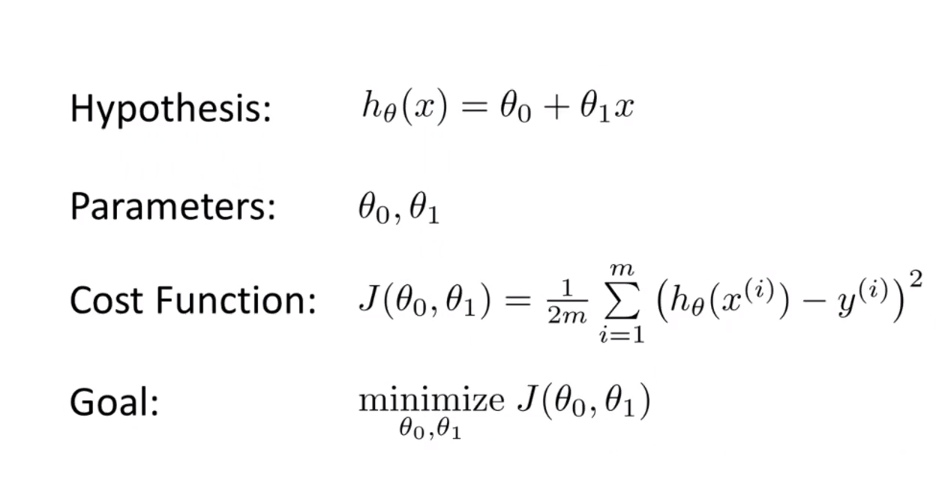
* Note that i have used vecorized version

In [19]:
def compute_cost(X, y, theta):
    m = X.shape[0]
    yhat = np.dot(X, theta)
    lost = np.power(yhat- y, 2)
    cost = 1/(2*m) * np.sum(lost)
    return cost

## Gradients
Gradients calculation using following formulas
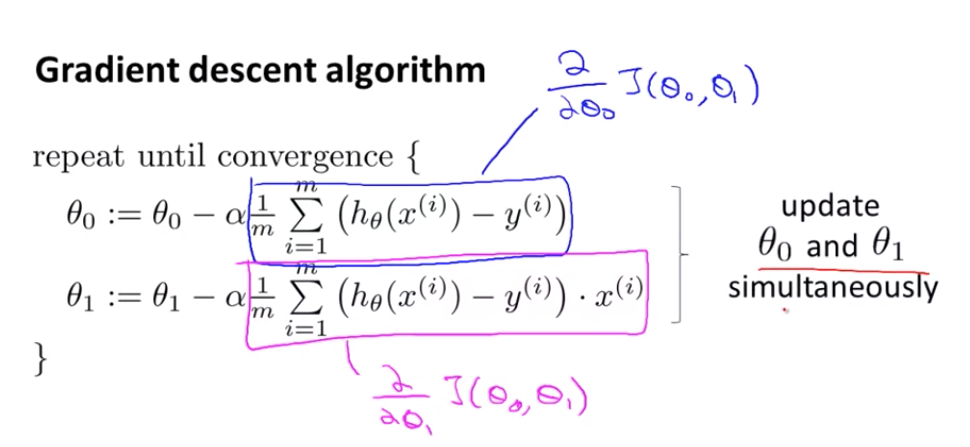
* Note that i have used vecorized version

In [20]:
def cal_gradients(X, y, theta):
    m = X.shape[0]
    yhat = np.dot(X, theta)
    gradients = 1/m * np.dot(X.T,(yhat - y))
    return gradients

## Updating parameters

In [21]:
def update_parameters(gradients, theta, alpha):
    theta = theta - alpha * gradients
    return theta

## Feature normalization
Feature normalization can help the accuracy and coverge speed of the model

In [22]:
def feature_normalization(X):
    X_norm = X;
    mu = np.zeros((1, X.shape[1]));
    sigma = np.zeros((1, X.shape[1]));
    for i in range(X.shape[1]):
        mu[0,i] = np.mean(X[:, i])
        sigma[0,i] = np.std(X[:, i])
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

## Finally: the model

In [23]:
def one_variable_linear_regression(dataset,inital_theta, itteration = 1500, alpha = 0.01, FN = 0):
    assert dataset.shape[1] == 2
    m = dataset.shape[0]
    theta = inital_theta
    X = np.reshape(dataset[:, 0],(-1,1))
    if FN == 1:
        X, X_mu, X_sigma = feature_normalization(X)
    X = np.append(np.zeros((m,1)) + 1, X, axis = 1) # add x0
    y = np.reshape(dataset[:,1], (-1,1))
    # X_norm, X_mu, X_sigma = feature_normalization(X)
    cost_save = np.array([])
    for i in range(itteration):
        gradients = cal_gradients(X, y, theta)
        theta = update_parameters(gradients, theta, alpha)
        cost = compute_cost(X, y, theta)
        cost_save= np.append(cost_save, cost)
    return cost_save, theta

## Test the model
For one variable regression, i have chosen "Horse Power" feature.<br />
First plot is the data and the predicted line by algorithm.<br />
Second plot is cost function per itteration.<br />
Final cost is too much, but considering the value of y(prices) it is pretty good.<br />
<br />
By using the feature normalization, we can achive lower cost value.

Predicted line by algorithm:


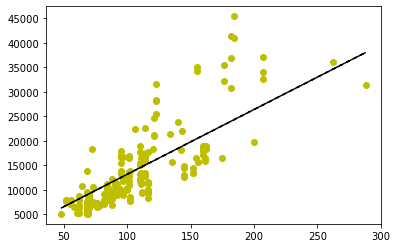

Cost value per itteration:


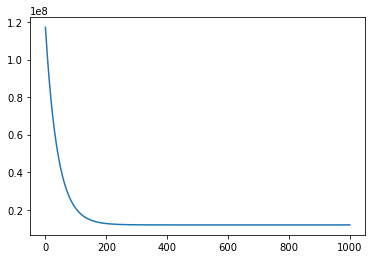


final cost is: 11885935.085904885

 final theta: [[0.6413553272654707]
 [131.99806245436324]]


In [24]:
data_all = load_data()
dataset = np.append(np.reshape(data_all[:, 21], (-1,1)), np.reshape(data_all[:, 25], (-1,1)), axis=1)

theta = np.zeros((2,1))
c, t= one_variable_linear_regression(dataset, theta, 1000, 0.000001)
plt.plot(data_all[:, 21],data_all[:, 25], 'yo', data_all[:, 21], t[0] + data_all[:, 21] * t[1], '--k')
print("Predicted line by algorithm:")
plt.show()
plt.plot(c)
print("Cost value per itteration:")
plt.show()
print("\nfinal cost is:", c[-1])
print("\n final theta:", t)

# Mluti-variable linear regression
i haven't hardcoded any variable in the previous functions, so we can use them here.
<br/>
## data partitioning
seperating train data and test data:

In [25]:
def partition_data(dataset,train_percent = 0.9, CV_percent = 0, test_percent = 0.1):
    m = dataset.shape[0]
    train_number = floor(train_percent * m)
    CV_number = floor(CV_percent * m)
    test_number = floor(test_percent * m)
    # print(type(dataset))
    train_data = dataset[0:train_number, :]
    CV_data = dataset[train_number:CV_number+train_number, :]
    test_data = dataset[CV_number+train_number:, :]
    return train_data, CV_data, test_data

## prediction

In [42]:
def predict(X, theta, mu, sigma):
    m = X.shape[0]
    X_norm = (X - mu) / sigma
    X_norm = np.append(np.zeros((m,1)) + 1, X_norm, axis = 1)
    yhat = np.dot(X_norm, theta)
    # print(X)
    # print(X_norm)
    # print(theta)
    # print(X_norm)
    return yhat


## Model
i have used the oneHat encoder for categorical data

In [27]:
def linear_regression(dataset,inital_theta, itteration = 1500, alpha = 0.01, FN=0):
    m = dataset.shape[0]
    theta = inital_theta
    X = dataset[:,0:-1]
    X, X_mu, X_sigma = feature_normalization(X)
    X = np.append(np.zeros((m,1)) + 1, X, axis = 1) # add x0
    y = np.reshape(dataset[:,-1], (-1,1))
    cost_save = np.array([])
    for i in range(itteration):
        gradients = cal_gradients(X, y, theta)
        theta = update_parameters(gradients, theta, alpha)
        cost = compute_cost(X, y, theta)
        cost_save= np.append(cost_save, cost)
    return cost_save, theta, X_mu, X_sigma

## test the results

MSE plot:


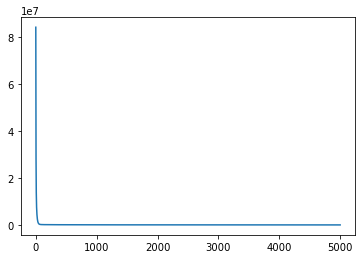

Final cost: 101205.37608347929


In [28]:
data_all = load_data()
dataset = data_all[:, 1:]
dataset = oneHat_encoder(data_all)
train_data, CV_data, test_data = partition_data(dataset,train_percent = 0.999, CV_percent = 0, test_percent = 0.001)
n = train_data.shape[1]
theta = np.zeros((n,1))
c , t, mu, sigma = linear_regression(train_data, theta, 5000, 0.175)
print("MSE plot:")
plt.plot(c)
plt.show()
print("Final cost:", c[-1])

now we can test one row of data:

In [29]:
yhat = predict(test_data[:, 0:-1], t, mu, sigma)

print("y:",test_data[:, -1])
print("yhat:", yhat)

y: [22625.0]
yhat: [[21478.049926249216]]


## Feature selection
We can draw 2D plot of some of the features and decide about them.

In [30]:
def plot_2D(dataset, D1, D2 = -1):
    for i in D1:
#         if not isinstance(dataset[1, i], str):
            print(i)
            plt.plot(dataset[:, i], dataset[:, D2], 'o')
            plt.show()

In the following 4 examples, we can see 4 features which obviously has linear effect on output.<br/>
This four features are carweight, enginsize, horsepower and highwaympg

(205, 25)
12


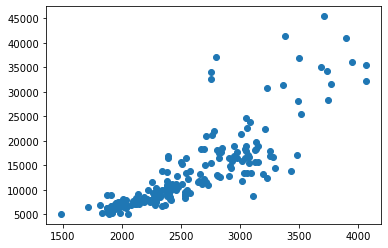

15


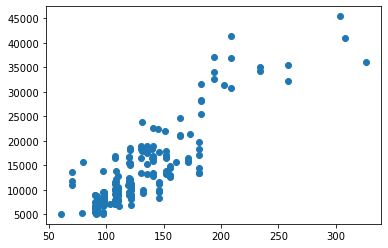

20


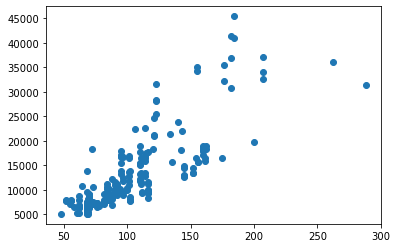

23


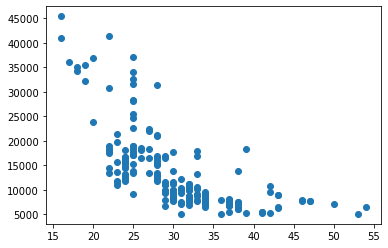

In [39]:
dataset = data_all[:, 1:]
plot_2D(dataset, [12, 15, 20, 23])

In the following 4 examples, we can see four features which apparently, has less effect on outcome
This four features are carheight, stroke, compressionratio and peakrpm

11


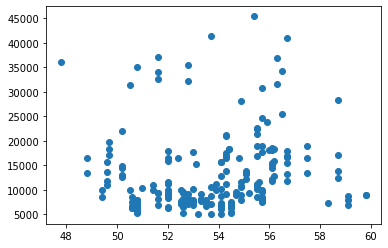

18


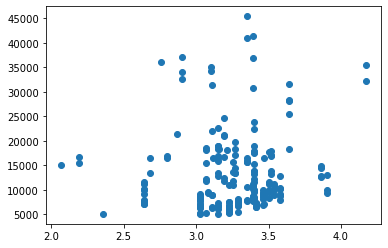

19


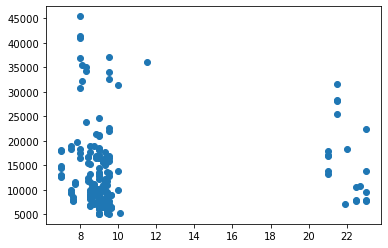

21


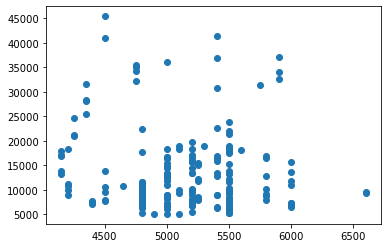

In [32]:
plot_2D(dataset, [11, 18, 19, 21])

so we can delete this four features.

In [143]:
def draw_predicts(dataset, t, mu, sigma):
    yhat = predict(dataset[:, 0:-1], t, mu, sigma)
    plt.plot(np.sort(yhat, axis=0), 'r--')
    plt.plot(np.sort(np.reshape(dataset[:, -1], (-1,1)), axis=0), 'b--')
    plt.legend(['predicts', 'real price'])
    print("thr red line is predictions and the blue one is actual values, they are very similar.\n note that i used tha same data for training and test")
    plt.show()

def draw_residual(dataset, t, mu, sigma):
    yhat = predict(dataset[:, 0:-1], t, mu, sigma)
    residuals = np.reshape(dataset[:, -1], (-1,1)) - yhat
    plt.plot(residuals, 'o')
    print("\n\n as shown below, most of the residuals are close to zero")
    plt.show()
    plt.hist(residuals)
    print("\n\n as shown below,  residuals a")
    plt.show()
    print("residuals mean error: ", np.mean(residuals))

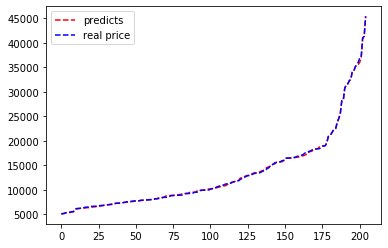

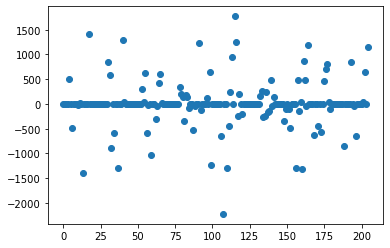

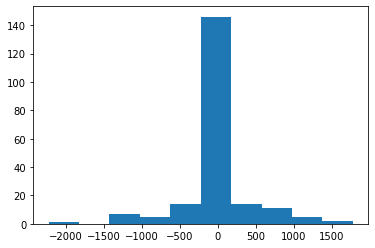

residuals mean error:  5.5948784085436625


In [43]:
dataset = data_all[:, 1:]
dataset = oneHat_encoder(data_all)
draw_predicts(dataset, t, mu, sigma)
draw_residual(dataset, t, mu, sigma)

the residuals  mean error may seem high, but in compare with price order, it is acceptable

In [140]:
def VIF_analysis(path = "LinearRegression_CarPrice.csv"):
    data = pd.read_csv(path)

    d = dict()
    keys = data.keys()
    for i in keys[:-1]:
        if not isinstance(data[i][0], str):
            d[i] = data[i]
        else:
            d[i] = pd.factorize(data[i])[0]
    X = pd.DataFrame(data=d)

    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns

    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                              for i in range(len(X.columns))]

    print(vif_data)

In [141]:
VIF_analysis()

             feature          VIF
0             car_ID   825.793550
1          symboling     3.765394
2            CarName   901.424192
3           fueltype   107.701465
4         aspiration     4.799072
5         doornumber     5.830386
6            carbody     9.692128
7         drivewheel     6.774563
8     enginelocation     2.227317
9          wheelbase  3012.255186
10         carlength  2525.647759
11          carwidth  4511.546133
12         carheight  1280.721353
13        curbweight   463.112465
14        enginetype    17.397271
15    cylindernumber     2.747888
16        enginesize   150.287944
17        fuelsystem     4.797181
18         boreratio   550.611859
19            stroke   197.781721
20  compressionratio   648.280502
21        horsepower   116.341536
22           peakrpm   351.959310
23           citympg   519.272943
24        highwaympg   629.643226


We can see several high VIF which indicate that they are are highly correlated to each other.
for example, (carwidth, wheelbase, carheight, carheight) are highle correlated which is logical.
also, correlation of (CarName, car_ID) or (highwaympg, compressionratio) are obvious